# Image Processing with OpenCV

``` 
Computer Vision is a field of deep learning that enables machines to see, identify and process images like humans.
```

In [165]:
from pyforest import *              # importing python libraries

import cv2                          # importing computervision

```
Now to read the image, use the imread() method of the cv2 module, specify the path
to the image in the arguments and store the image in a variable as below
```

In [166]:
img = cv2.imread('kohli.jpg')       # reading an image

In [167]:
print(type(img))                    # type of the image

<class 'numpy.ndarray'>


In [168]:
img.shape                           # shape of the image

(1350, 1080, 3)

In [169]:
img.size                            # size of the image

4374000

## Changing Color Spaces

```
OpenCV reads a given image in the BGR format by default. So, you’ll need to change 
the color space of your image from BGR to RGB when reading images using OpenCV.
```

In [170]:
# converting BGR to RGB
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

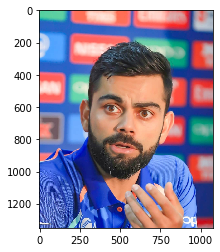

In [171]:
plt.imshow(image)                  # displaying the image

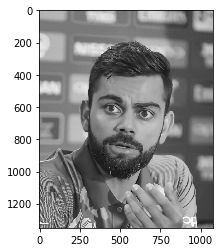

In [172]:
# converting the image to grayscle
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap = 'gray')

## Resizing Images

```
Machine learning models work with a fixed sized input. The same idea applies 
to computer vision models as well. The images we use for training our model 
must be of the same size. Images can be easily scaled up and down using OpenCV.
```

In [173]:
# creating a function to resize the given input image
def resize(ip, width, height):
    dim = (width, height)
    p = cv2.resize(ip,
                   dim, 
                   interpolation=cv2.INTER_CUBIC)
    return p

original image:  (1350, 1080, 3)
resized image:  (300, 300, 3)


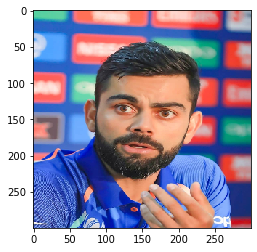

In [174]:
# displaying the original and resized image shape
resize_image = resize(image, 300, 300)

print('original image: ', image.shape)
print('resized image: ', resize_image.shape)

plt.imshow(resize_image)

In [175]:
# function to downscale and upscale the image
def resize_scaling(ip, percentage):
    width = int(ip.shape[1] * percentage / 100)
    height = int(ip.shape[0] * percentage / 100)
    dim = (width, height)
    f1 = cv2.resize(ip, 
                    dim, 
                    interpolation = cv2.INTER_NEAREST)
    return f1

Original Image:  (1350, 1080, 3)
Resized Image:  (2565, 2052, 3)


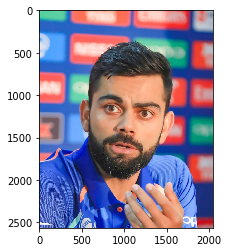

In [176]:
# displaying the original and resized image shape
resized_image = resize_scaling(image, 190)

print('Original Image: ', image.shape)
print('Resized Image: ', resized_image.shape)
plt.imshow(resized_image)

## Image Rotation

```
We require a large amount of data to train a deep learning model. Data augmentation 
is a technique uses the available data samples to produce the new ones, by applying 
image operations like rotation, scaling, translation, etc. This makes our model robust 
to changes in input and leads to better generalization.
```

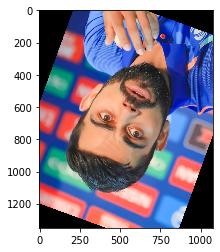

In [177]:
# rotating the image
rows,cols = image.shape[:2]  
M = cv2.getRotationMatrix2D((cols/2,rows/2),
                            160,
                            1)                       #finding the centre and roatation the image 160 degrees
rot_img = cv2.warpAffine(image,
                         M,
                         (cols,rows)) 

plt.imshow(rot_img)

## Image Cropping

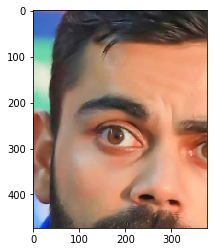

In [178]:
# cropping the image
height, width = image.shape[0:2]

startRow = int(height*.25)
startCol = int(width*.25)
endRow = int(height*.60)
endCol = int(width*.60)

croppedImage = image[startRow:endRow, 
                     startCol:endCol]

plt.imshow(croppedImage)

## Image Translation

```
Image translation is a geometric transformation that maps the position of every
object in the image to a new location in the final output image. It can be used 
to add shift invariance to the model, as by tranlation we can change the position 
of the object in the image give more variety to the model that leads to better 
generalizability which works in difficult conditions.
```

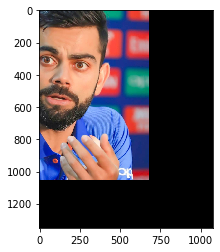

In [179]:
#Image Translation
N = np.float32([[1,0,-400],
                [0,1,-300]]) 
dst = cv2.warpAffine(image,
                     N,
                     (cols,rows))

plt.imshow(dst)

## Edge Detection

```
Edges are the points in an image where the image brightness changes sharply 
or has discontinuities. Edges are very useful features of an image that can 
be used for different applications like classification of objects in the image a
nd localization. Even deep learning models calculate edge features to extract 
information about the objects present in image.
```

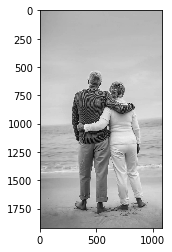

In [180]:
pix = cv2.imread('Img006.jpg')                  # reading the image
gray_imge = cv2.cvtColor(pix, 
                         cv2.COLOR_BGR2GRAY)    # converting into grayscale

plt.imshow(gray_imge,cmap = 'gray')

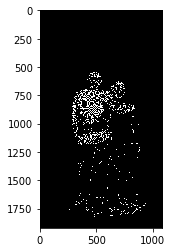

In [181]:
# finding the edges of the image
edges = cv2.Canny(gray_imge, 
                  threshold1=120, 
                  threshold2=120)

plt.imshow(edges,cmap = 'gray')

## Image Blurring

```
Blurring is widely used effect in graphics software, used to make an image smooth 
in which edges are not observed and to reduce image noise.
```

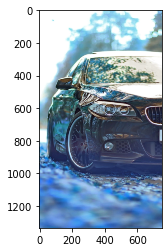

In [182]:
# Using guassian blur for an image
imgb = cv2.imread('bmw.jpg')
blur_image = cv2.GaussianBlur(imgb, (7,7), 0)

plt.imshow(blur_image)

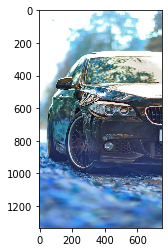

In [183]:
# using median blur
mblur_image = cv2.medianBlur(imgb,3)

plt.imshow(mblur_image)

## Image Thresholding

```
Thresholding is an image segmentation method. It compares pixel values with a 
threshold value and updates it accordingly. OpenCV supports multiple variations 
of thresholding.
```

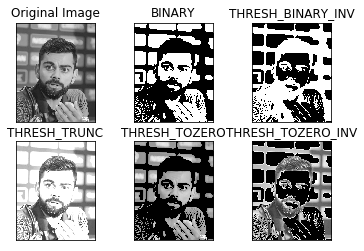

In [184]:
# reading the grayscale image
gray_image = cv2.imread('kohli.jpg',0)

# filtering the image with different styles
ret,thresh_binary = cv2.threshold(gray_image,127,255,
                                  cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,
                                      cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,
                                 cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,
                                  cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,
                                      cv2.THRESH_TOZERO_INV)

# to display the different thresholding styles
names = ['Original Image',
         'BINARY',
         'THRESH_BINARY_INV',
         'THRESH_TRUNC',
         'THRESH_TOZERO',
         'THRESH_TOZERO_INV']
images = gray_image, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

## Detecting Contours

```
A contour is a closed curve joining all the continuous points having some 
color or intensity, they represent the shapes of objects found in an image. 
It is a used for shape analysis and object detection and recognition.
```

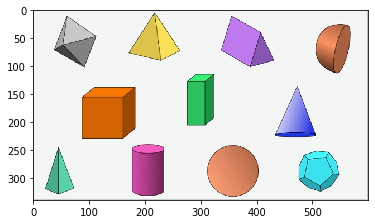

In [185]:
c_image = cv2.imread('shape.jpg')

plt.imshow(c_image)

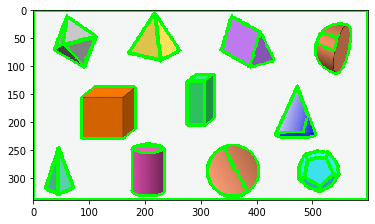

In [186]:
gray_images = cv2.cvtColor(c_image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_images,127,255,0) 

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(c_image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

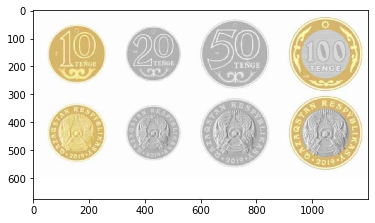

In [187]:
coin = cv2.imread('coins.jpg')
coins = cv2.cvtColor(coin, cv2.COLOR_BGR2RGB)

plt.imshow(coins)

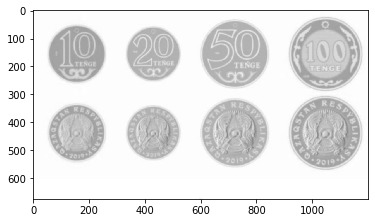

In [188]:
# converting the image into grayscale and applying blur effect
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, 
                                      (5, 5), 
                                      0)

plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

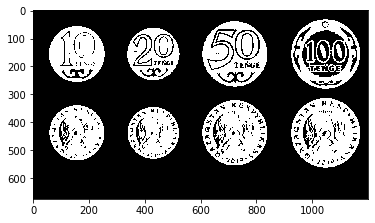

In [189]:
_, coins_binary = cv2.threshold(coins_preprocessed, 200, 255, 
                                cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))

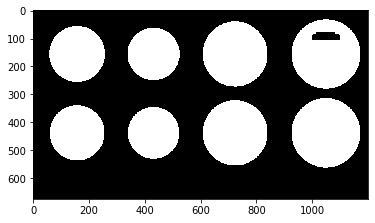

In [190]:
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,50),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, 
                               cv2.MORPH_CLOSE, 
                               morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

## Reading Multiple Images from a Folder

In [195]:
import glob

cv_img = []
for img in glob.glob(r'C:\Users\tejar\OneDrive\Desktop\Tarah Tech\jpg\*.jpg'):
    n= cv2.imread(img)
    n = cv2.cvtColor(n,cv2.COLOR_BGR2RGB)
    cv_img.append(n)

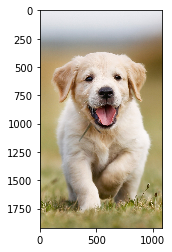

In [196]:
plt.imshow(cv_img[0])

In [197]:
def resized_img(data, width, height):
    
    n_resized = []
    for i in data:
        dim = (width, height)
        f1 = cv2.resize(i, dim, interpolation = cv2.INTER_NEAREST)
        n_resized.append(f1)
    return n_resized

In [198]:
pics = resized_img(cv_img,900,900)

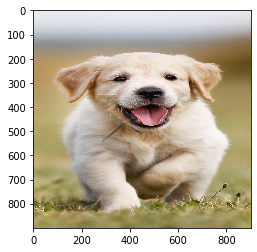

In [199]:
plt.imshow(pics[0])

In [200]:
def resized_percent(data, scale_percent):
    
    resized = []
    for i in data:
        width = int(i.shape[1] * scale_percent/100)
        height = int(i.shape[0] * scale_percent/100)
        dim = (width, height)
        f1 = cv2.resize(i, dim, interpolation = cv2.INTER_NEAREST)
        resized.append(f1)
    return resized

In [201]:
new_images = resized_percent(cv_img,180)

Original Image shape:  (1920, 1080, 3)
Resized Image:  (3456, 1944, 3)


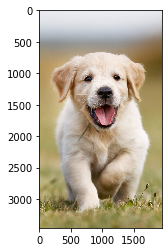

In [202]:
print('Original Image shape: ',cv_img[0].shape)
print('Resized Image: ', new_images[0].shape)

plt.imshow(new_images[0])